# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Read the mouse data and the study results
study_results = pd.read_csv("../Pymaceuticals/data/Study_results.csv")
mouse_metadata = pd.read_csv("../Pymaceuticals/data/Mouse_metadata.csv")

# Merge school and student data
merge_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
merge_data


# Display the data table for preview
merge_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [63]:
merge_data.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [50]:
# Checking the number of mice.
total_mice = merge_data['Mouse ID'].nunique()
total_mice



249

In [52]:

# Get the duplicate mice by ID number that show up for Mouse ID and Timepoint
duplicate_mice = merge_data[merge_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

# Display the duplicate mice by ID number
duplicate_mice

array(['g989'], dtype=object)

In [84]:
# Get all data for the duplicate mouse IDs
duplicate_data = merge_data[merge_data["Mouse ID"].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [113]:
# my Answere :Create a clean DataFrame by dropping the duplicate mouse IDs
clean_data = merge_data[~merge_data["Mouse ID"].isin(duplicate_mice)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [67]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", num_clean_mice)


Number of mice in the clean DataFrame: 248


In [ ]:
Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Assemble the resulting series into a single summary DataFrame with custom column names
summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": summary_statistics["mean"],
    "Median Tumor Volume": summary_statistics["median"],
    "Tumor Volume Variance": summary_statistics["var"],
    "Tumor Volume Std. Dev.": summary_statistics["std"],
    "Tumor Volume Std. Err.": summary_statistics["sem"]
})

summary_statistics_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Answer
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using aggregation
summary_statistics_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Var="var",
    Std="std",
    Sem="sem"
).reset_index()
# ssummary_statistics_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume"}, inplace=True)
summary_statistics_df


,Drug Regimen,Mean,Median,Var,Std,Sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

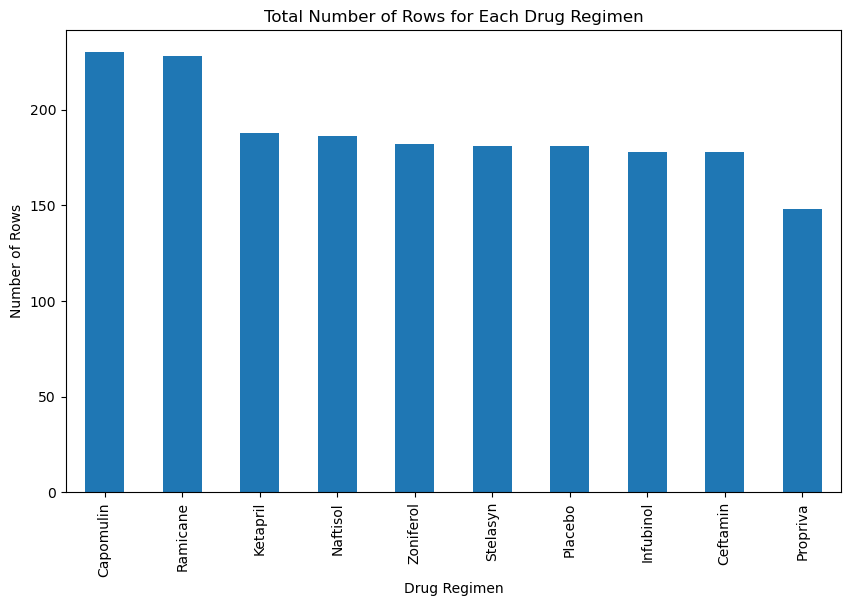

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
regimen_counts = clean_data["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

plt.show()


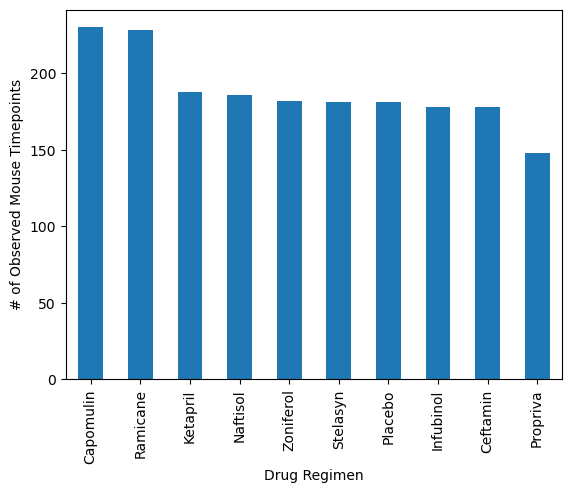

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


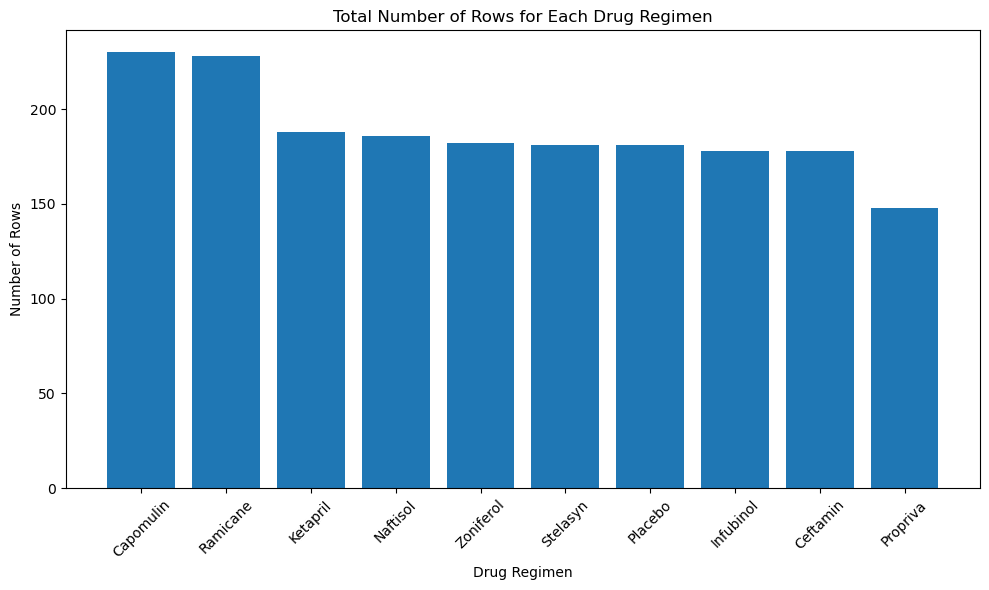

In [88]:
import matplotlib.pyplot as plt

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
regimen_counts = clean_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


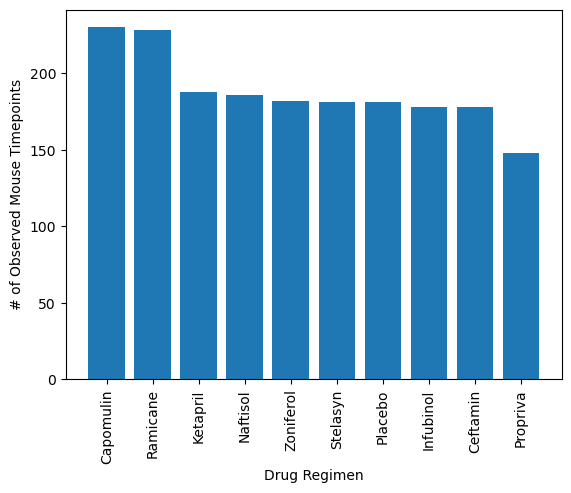

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


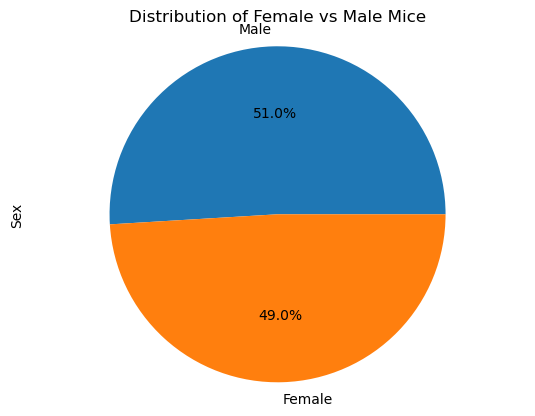

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data["Sex"].value_counts()

gender_distribution.plot.pie(autopct="%1.1f%%", startangle=360)
plt.title("Distribution of Female vs Male Mice")

plt.axis("equal")  # Equal aspect ratio ensures the pie is circular

plt.show()


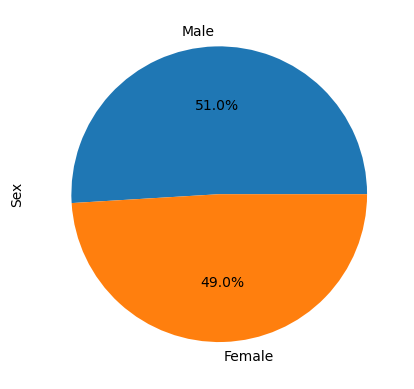

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [97]:
# List of the selected treatment regimens
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter data for the selected treatment regimens
selected_data = clean_data[clean_data["Drug Regimen"].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = selected_data.groupby("Mouse ID")["Timepoint"].max()

# Merge the last timepoints with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, selected_data, on=["Mouse ID", "Timepoint"])

final_tumor_volume = final_tumor_volume[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [105]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Answer

In [106]:
# List of treatment regiment
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store tumor volume data for plotting
tumor_vol_data = []

# Loop through 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Append the tumor volume 
    tumor_vol_data.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine potential outliers 
    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the potential outliers for each treatment regimen
    print(f"{treatment}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


In [ ]:
# Answer

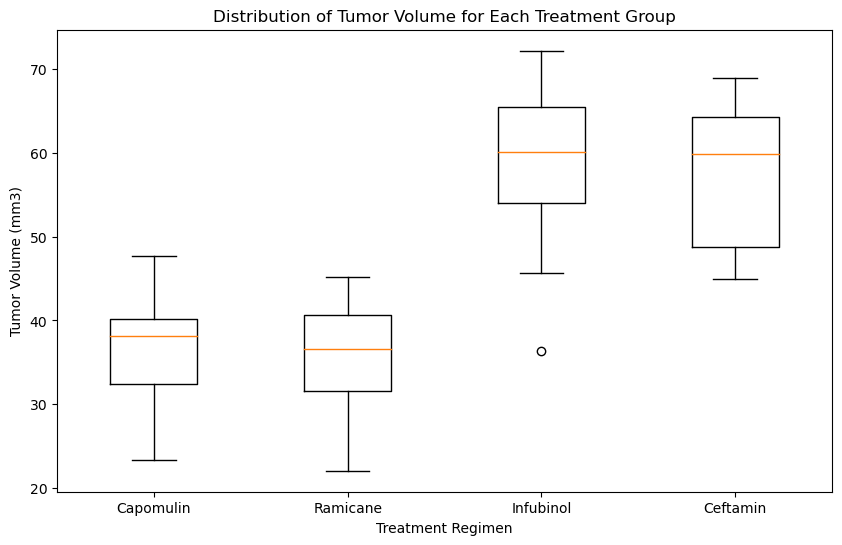

In [100]:
import matplotlib.pyplot as plt

# Generate a box plot for the distribution of tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


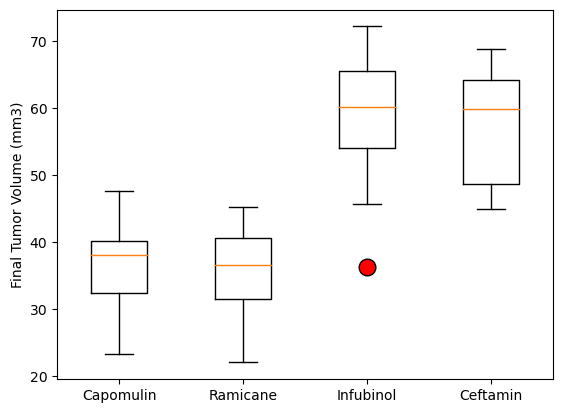

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


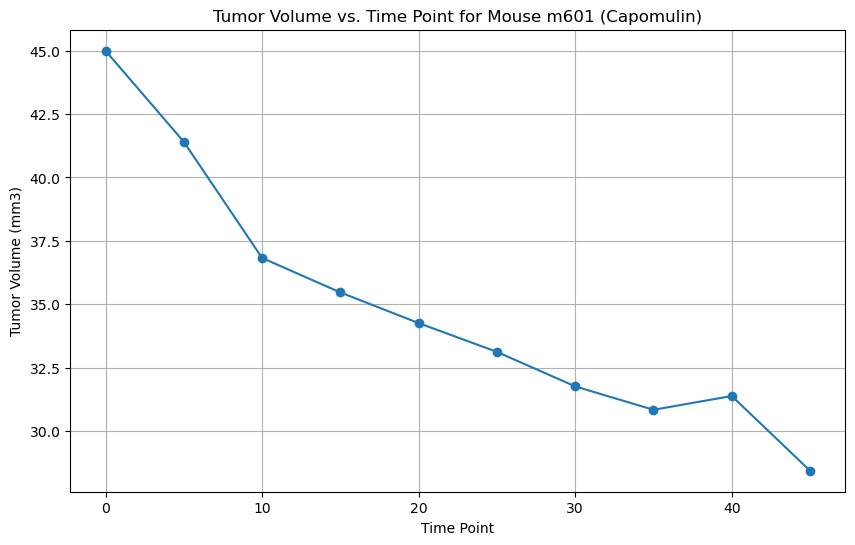

In [117]:
# Choose a single mouse treated with Capomulin
selected_mouse = "m601"

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.show()

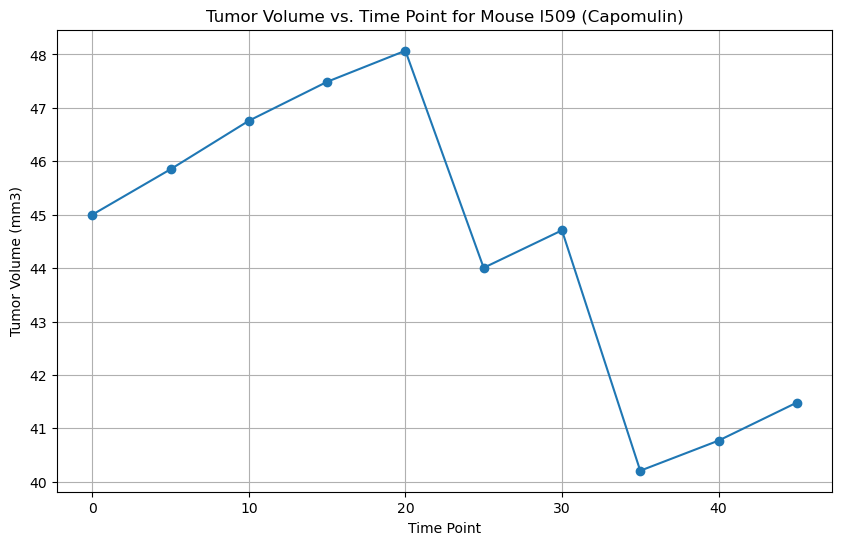

In [114]:
# Choose a single mouse treated with Capomulin
selected_mouse = "l509"
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.show()


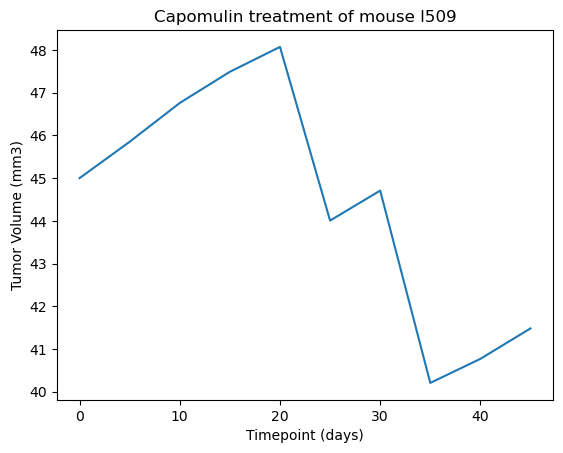

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


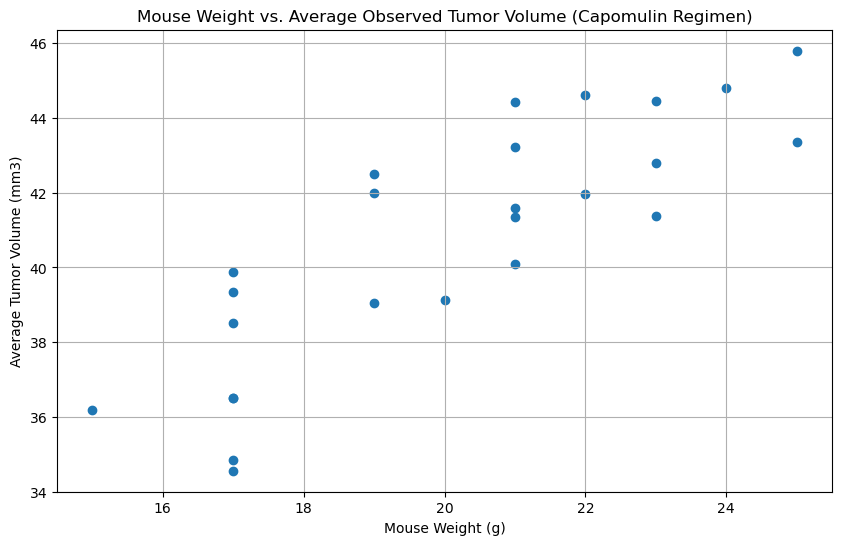

In [102]:
# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
capomulin_avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse metadata to get the corresponding weight
capomulin_avg_tumor_vol_df = pd.merge(capomulin_avg_tumor_vol, mouse_metadata, on="Mouse ID")

# Generate a scatter plot of mouse weight vs. average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_vol_df["Weight (g)"], capomulin_avg_tumor_vol_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

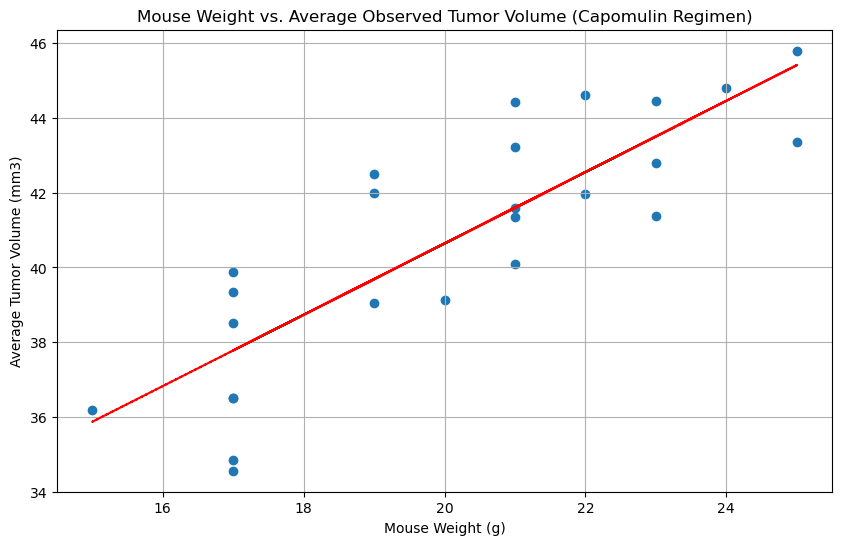

Correlation Coefficient: 0.8419363424694722
Linear Regression:
Slope: 0.9544396890241049
Intercept: 21.552160532685008


In [103]:
from scipy.stats import linregress

# Calculate the correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen
correlation = capomulin_avg_tumor_vol_df["Weight (g)"].corr(capomulin_avg_tumor_vol_df["Tumor Volume (mm3)"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    capomulin_avg_tumor_vol_df["Weight (g)"], capomulin_avg_tumor_vol_df["Tumor Volume (mm3)"]
)

# Create the regression line
regression_line = slope * capomulin_avg_tumor_vol_df["Weight (g)"] + intercept

# Generate a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_vol_df["Weight (g)"], capomulin_avg_tumor_vol_df["Tumor Volume (mm3)"])
plt.plot(capomulin_avg_tumor_vol_df["Weight (g)"], regression_line, color="red", linestyle="--")
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

plt.show()

print("Correlation Coefficient:", correlation)
print("Linear Regression:")
print("Slope:", slope)
print("Intercept:", intercept)


The correlation between mouse weight and the average tumor volume is 0.84


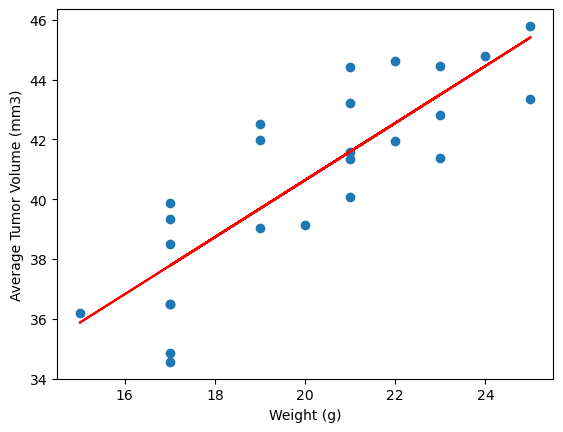